
# Decision Trees and Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



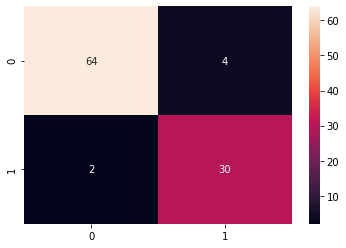

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [9]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


[Text(334.8, 380.52, 'X[0] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(167.4, 271.8, 'X[1] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(83.7, 163.07999999999998, 'X[0] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(41.85, 54.360000000000014, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= -1.151\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 54.360000000000014, 'gini = 0.229\nsamples = 38\nvalue = [5, 33]'),
 Text(502.20000000000005, 271.8, 'X[0] <= 0.829\ngini = 0.275\nsamples = 85\nvalue = [14, 71]'),
 Text(418.5, 163.07999999999998, 'X[1] <= -0.51\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 

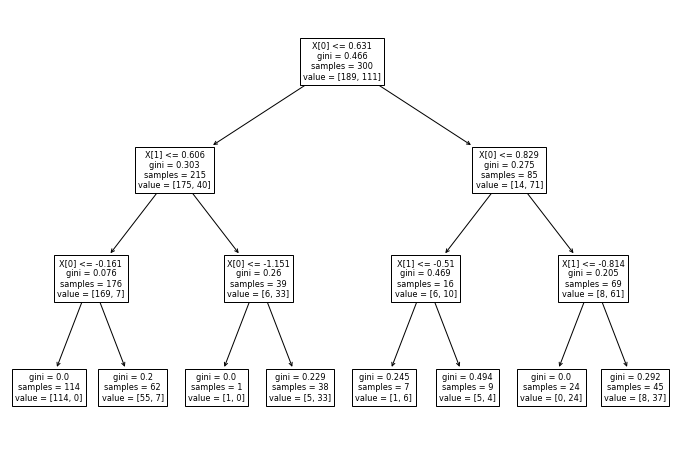

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


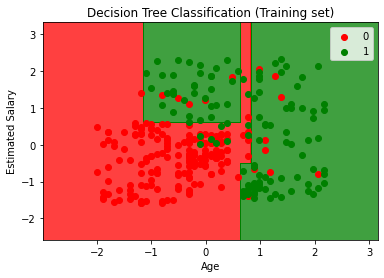

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


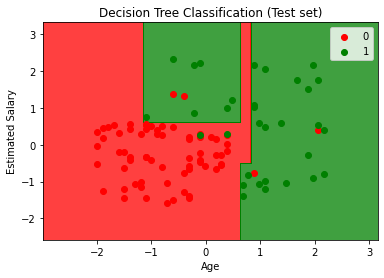

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Apply the decision tree algorithm on the provided dataset (diabetes.csv).

In [13]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Loading Data
### The data file diabetes.csv is available on Moodle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [14]:
# Define the labels for the disbeties datafile
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=0, names=col_names)
# change the path of C drive where you have downsloaded your "pima-indians-diabetes.csv"

In [15]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection

In [16]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
X, y

(     pregnant  insulin   bmi  age  glucose  bp  pedigree
 0           6        0  33.6   50      148  72     0.627
 1           1        0  26.6   31       85  66     0.351
 2           8        0  23.3   32      183  64     0.672
 3           1       94  28.1   21       89  66     0.167
 4           0      168  43.1   33      137  40     2.288
 ..        ...      ...   ...  ...      ...  ..       ...
 763        10      180  32.9   63      101  76     0.171
 764         2        0  36.8   27      122  70     0.340
 765         5      112  26.2   30      121  72     0.245
 766         1        0  30.1   47      126  60     0.349
 767         1        0  30.4   23       93  70     0.315
 
 [768 rows x 7 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: label, Length: 768, dtype: int64)

## Splitting Data

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building Decision Tree Model

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


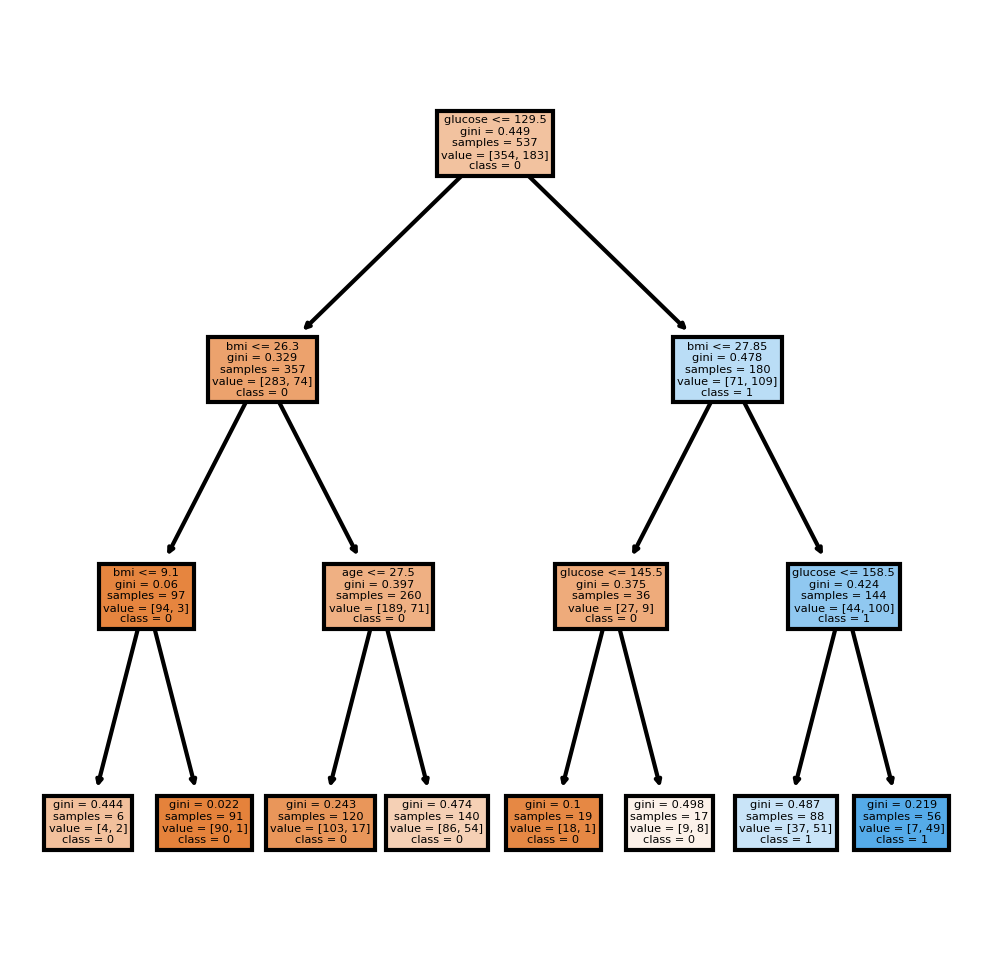

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# classes of dataset
cn=['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);
# In case of any errors, install conda install python-graphviz     on the command line

In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

## Optimizing Decision Tree Performance
### criterion : optional (default=”gini”)
Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

## splitter : string, optional (default=”best”) or Split Strategy:¶
This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

## max_depth : int or None, optional (default=None) or Maximum Depth of a Tree:
The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


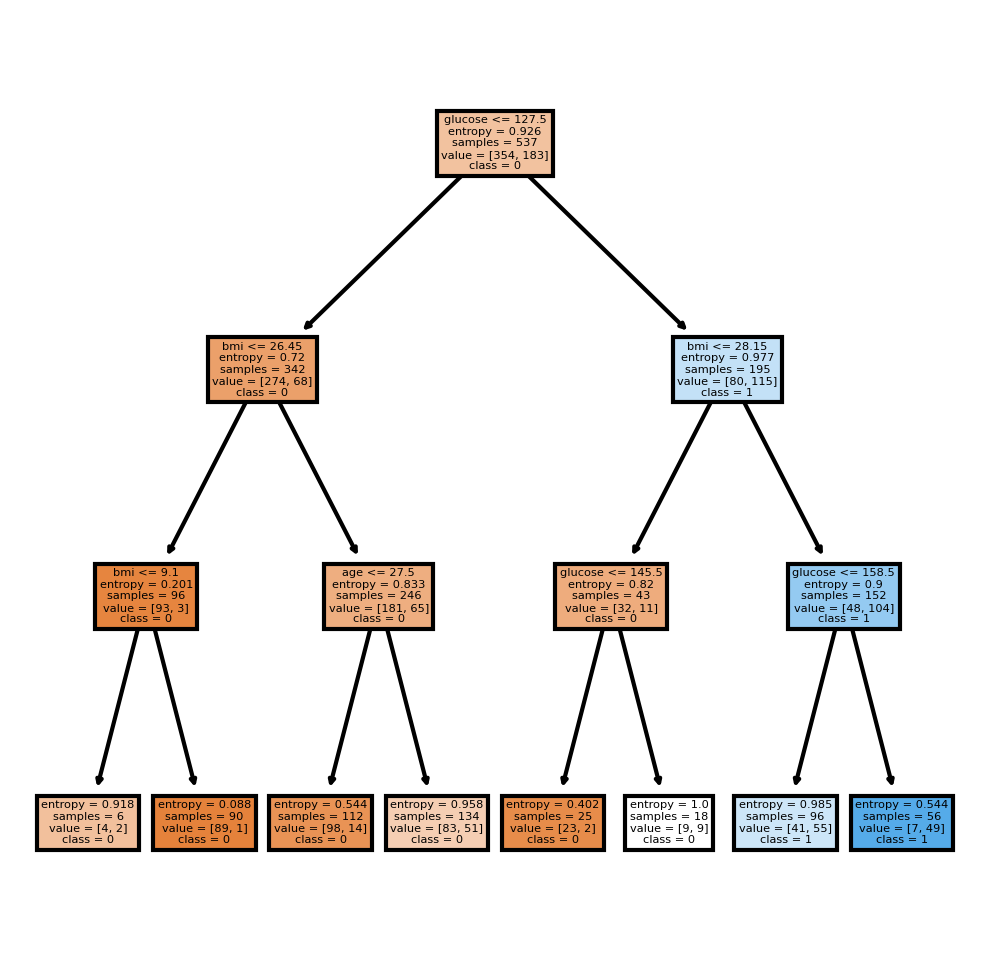

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# classes of dataset
cn=['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);
# set the path of your system
fig.savefig('C:/Users/munaw/Downloads/imagename.png',bbox_inches='tight')

# Random Forest
We are building a model on the iris flower dataset, which is a very famous classification set. It comprises the sepal length, sepal width, petal length, petal width, and type of flowers. There are three species or classes: setosa, versicolor, and virginia. You will build a model to classify the type of flower. The dataset is available in the scikit-learn library or you can download it from the UCI Machine Learning Repository.

Start by importing the datasets library from scikit-learn, and load the iris dataset with load_iris().

In [32]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [33]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [34]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [35]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


We can also make a prediction for a single item, for example:
#### sepal length = 3
#### sepal width = 5
#### petal length = 4
#### petal width = 2
Now you can predict which type of flower it is.

In [39]:
clf.predict([[3, 5, 4, 2]])

array([2])

This shows that the 2 indicates the flower type Virginica.

## Finding Important Features in Scikit-learn
We are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:
1. First, you need to create a random forests model.
2. Second, use the feature importance variable to see feature importance scores.
3. Third, visualize these scores using the seaborn library.

In [40]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.463596
petal length (cm)    0.431609
sepal length (cm)    0.068599
sepal width (cm)     0.036197
dtype: float64

We can visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, we can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.

No handles with labels found to put in legend.


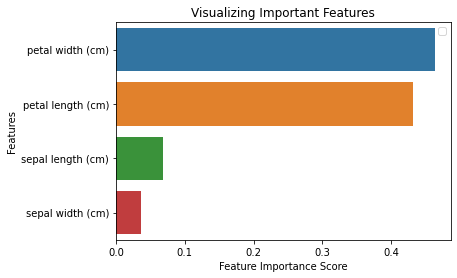

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the Model on Selected Features
We can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [43]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X = data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"

# y is called as the target variable
y = data['species']                                       

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9428571428571428


Therefore, we can see that after removing the least important features (sepal length), the accuracy increased. This is because you removed misleading data and noise, resulting in an increased accuracy. A lesser amount of features also reduces the training time.


## Apply RandomForest Classifier method for the feature selection for the dataset (car_evaluation.csv).

In [81]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']   
df = pd.read_csv('car_evaluation.csv', header = 0, names = col_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [82]:
# Install the following libraary
# conda install -c conda-forge category_encoders
# import category encoders

In [83]:
import category_encoders as ce
import pandas as pd

# Example to understand the label encoding
import category_encoders as ce
import pandas as pd

encoder1 = ce.OrdinalEncoder(cols=['class'], return_df = True,
                  mapping=[{'col':'class','mapping':{'acc':1,'good':2,'unacc':3,'vgood':4}}])

encoder2 = ce.OrdinalEncoder(cols=['safety'], return_df = True,
                  mapping=[{'col':'safety','mapping':{'low':0,'med':1,'high':2}}])

encoder3 = ce.OrdinalEncoder(cols=['lug_boot'], return_df = True,
                  mapping=[{'col':'lug_boot','mapping':{'small':0,'med':1,'big':2}}])

encoder4 = ce.OrdinalEncoder(cols=['persons'], return_df = True,
                  mapping=[{'col':'persons','mapping':{'2':0,'4':1,'more':2}}])

encoder5 = ce.OrdinalEncoder(cols=['doors'], return_df = True,
                  mapping=[{'col':'doors','mapping':{'2':2,'3':3,'4':4,'5more':5}}])

encoder6 = ce.OrdinalEncoder(cols=['maint'], return_df = True,
                  mapping=[{'col':'maint','mapping':{'low':0,'med':1,'high':2,'vhigh':3}}])

encoder7 = ce.OrdinalEncoder(cols=['buying'], return_df = True,
                  mapping=[{'col':'buying','mapping':{'low':0,'med':1,'high':2,'vhigh':3}}])


# fit and transform train data 
df_copy = encoder1.fit_transform(df)
df_copy = encoder2.fit_transform(df_copy)
df_copy = encoder3.fit_transform(df_copy)
df_copy = encoder4.fit_transform(df_copy)
df_copy = encoder5.fit_transform(df_copy)
df_copy = encoder6.fit_transform(df_copy)
df_copy = encoder7.fit_transform(df_copy)

df_1 = df_copy.copy()
df_1.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,0,0,1,3
1,3,3,2,0,0,2,3
2,3,3,2,0,1,0,3
3,3,3,2,0,1,1,3
4,3,3,2,0,1,2,3
5,3,3,2,0,2,0,3
6,3,3,2,0,2,1,3
7,3,3,2,0,2,2,3
8,3,3,2,1,0,0,3
9,3,3,2,1,0,1,3


In [84]:
# check missing values in variables

df_1.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [85]:
X = df_1.drop(['class'], axis=1)

y = df_1['class']

X = pd.DataFrame(X).to_numpy()

y = pd.DataFrame(y).to_numpy()

In [86]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [87]:
X_train

array([[3, 3, 5, 0, 1, 0],
       [3, 3, 3, 2, 1, 1],
       [2, 3, 3, 1, 0, 1],
       ...,
       [2, 0, 5, 2, 2, 0],
       [0, 2, 4, 0, 0, 2],
       [1, 1, 3, 2, 0, 2]])

In [88]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [89]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9719


In [90]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9719


In [101]:
# declare feature vector and target variable

X = df_1.drop(['class', 'doors'], axis=1)

y = df_1['class']

In [102]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [103]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9228


## Reference: 
1. <p>www.datacamp.com/community/tutorials/random-forests-classifier-python</p>
2. <p>www.datacamp.com/community/tutorials/decision-tree-classification-python</p>
3. <p>www.kaggle.com</p>